In [1]:
!nvidia-smi

Mon Nov 11 11:56:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip uninstall ultralytics -y
!pip install ultralytics --no-cache-dir --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 28.9 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t4DiHJzpmpEnGCNNSHwd")
project = rf.workspace("son-iktl5").project("final-f0jjh")
version = project.version(1)
dataset = version.download("yolov11")               

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to final-1 in yolov11:: 100%|██████████| 19800/19800 [00:03<00:00, 6272.00it/s]


In [6]:
dataset.location

'/kaggle/working/final-1'

In [7]:
!yolo task=detect mode=train model='/content/yolo11m.pt' data={dataset.location}/data.yaml epochs=50 imgsz=640

100%|███████████████████████████████████████| 38.8M/38.8M [00:00<00:00, 328MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11m.pt, data=/kaggle/working/final-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

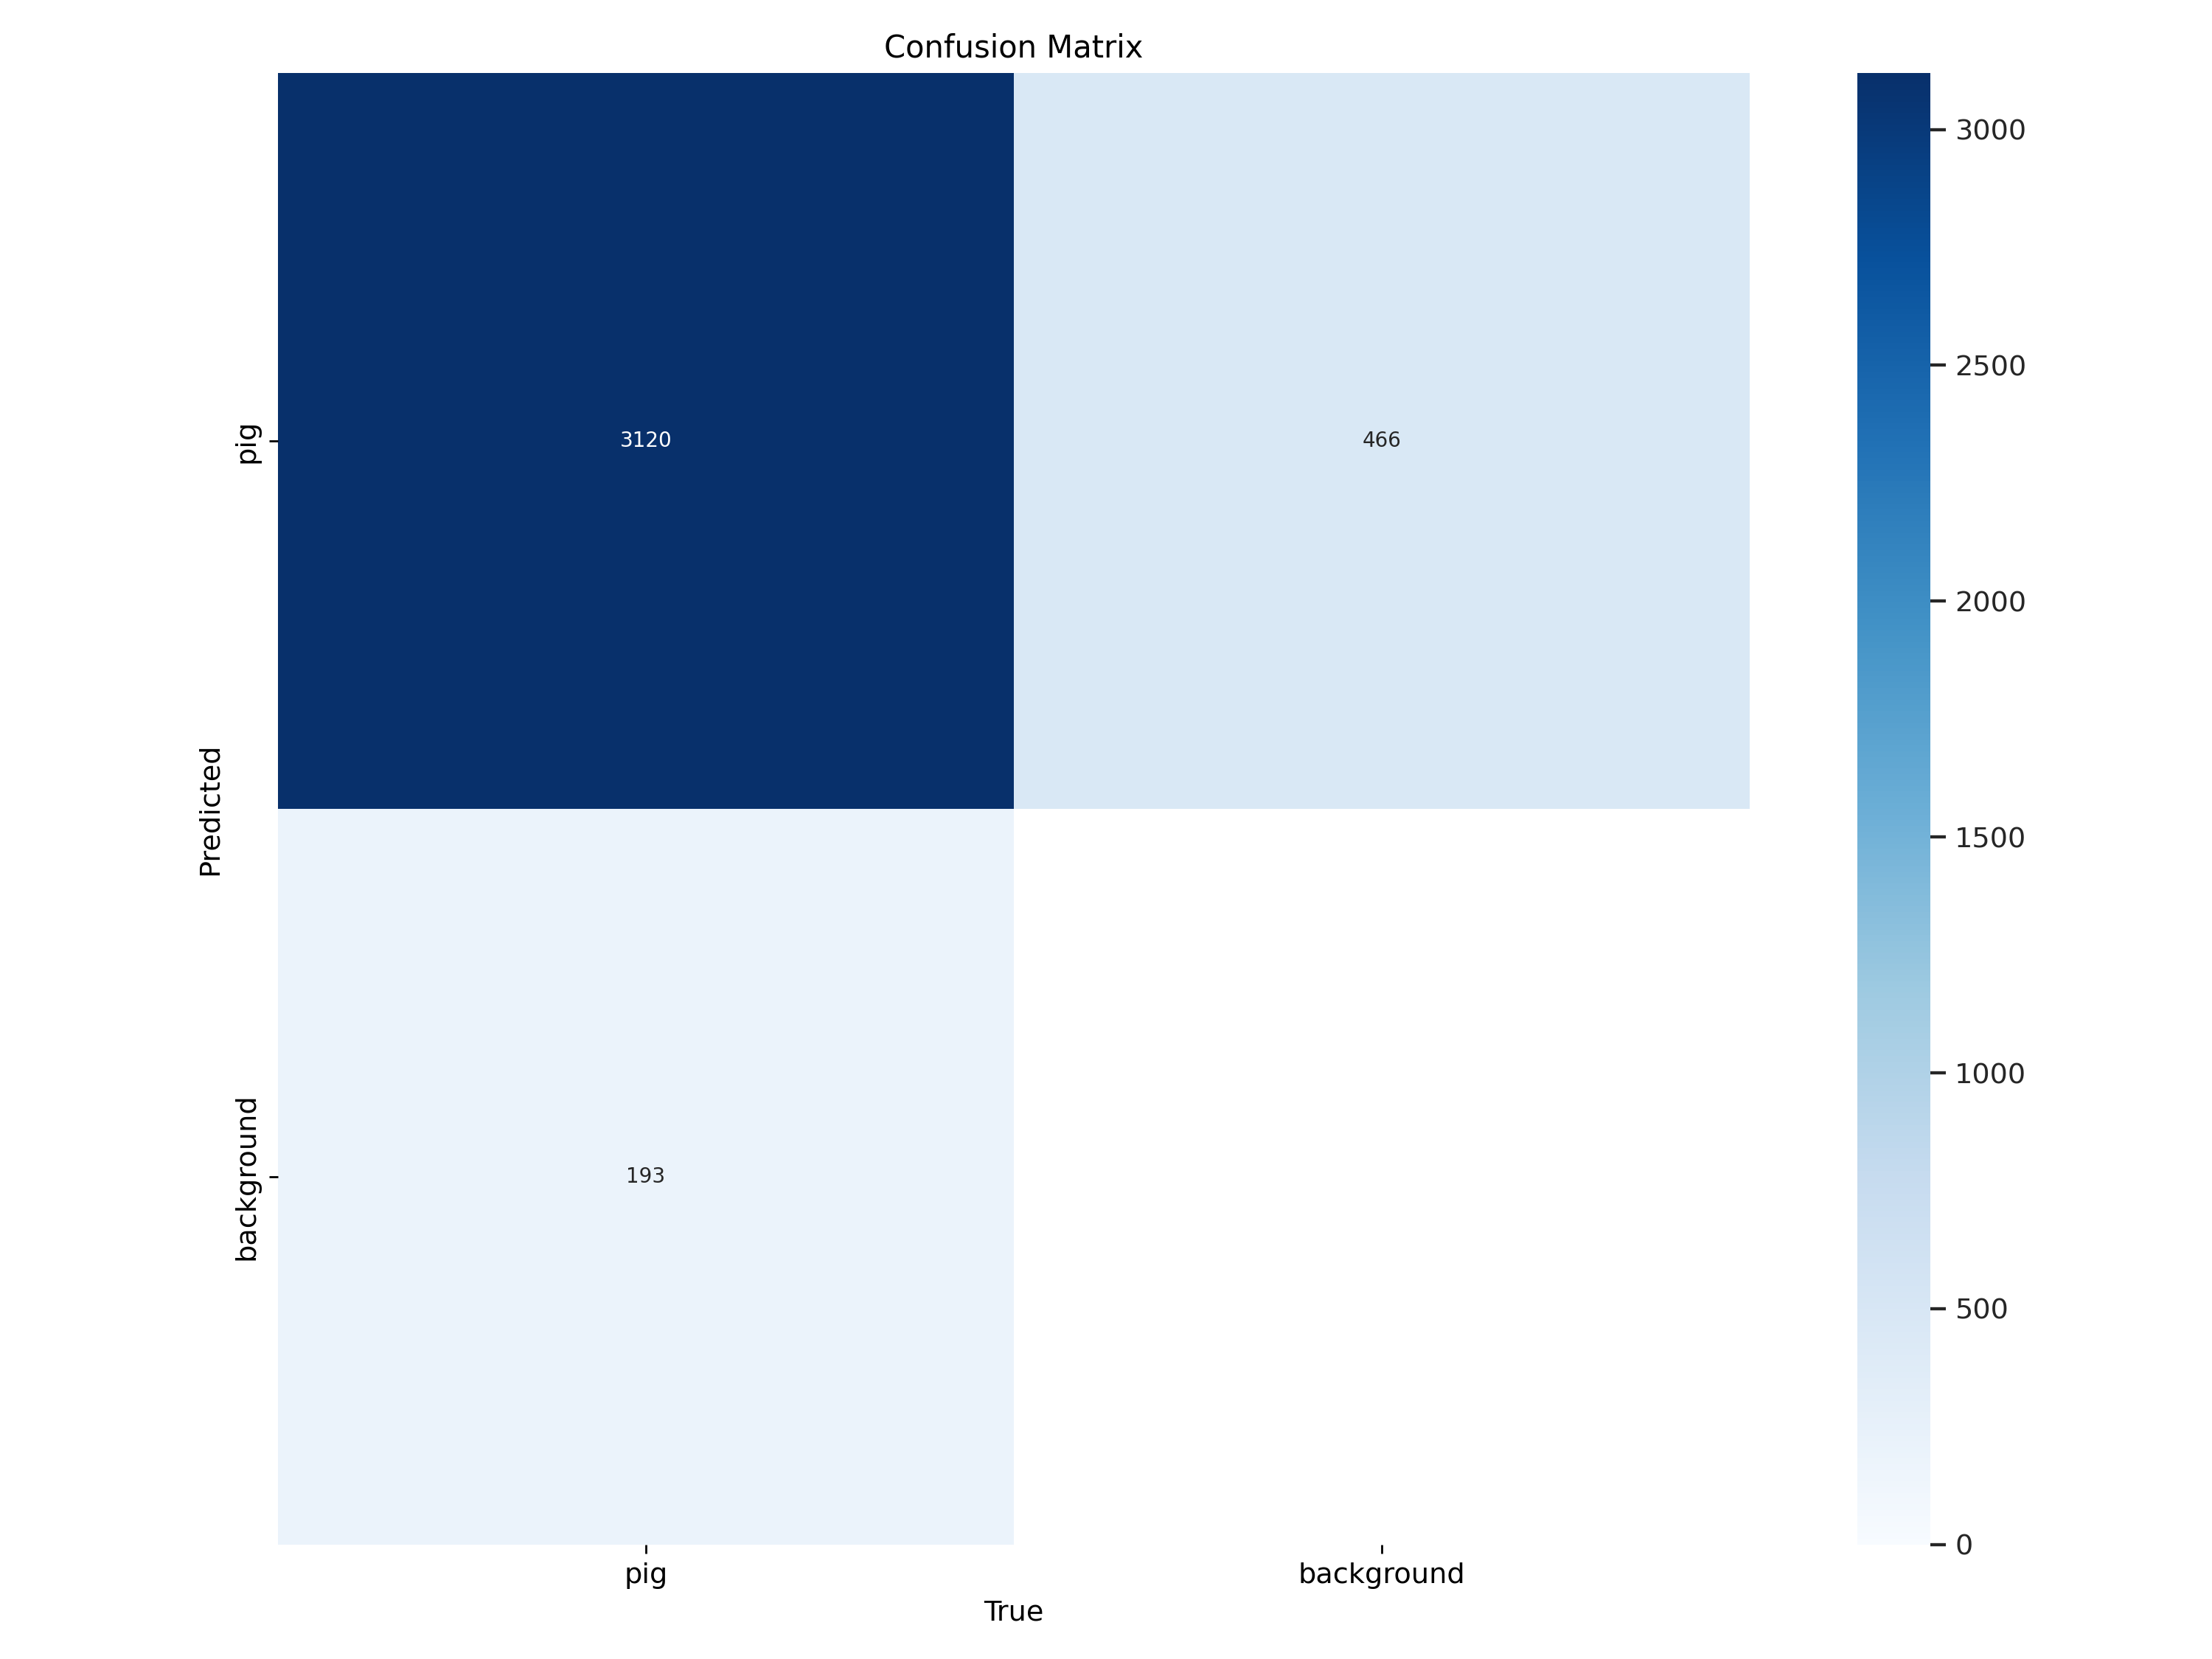

In [8]:
Image('/kaggle/working/runs/detect/train/confusion_matrix.png',width=800)

In [9]:
#dataset https://universe.roboflow.com/son-iktl5/final-f0jjh/dataset/1#

In [ ]:
Image('/kaggle/working/runs/detect/train/confusion_matrix.png',width=800)

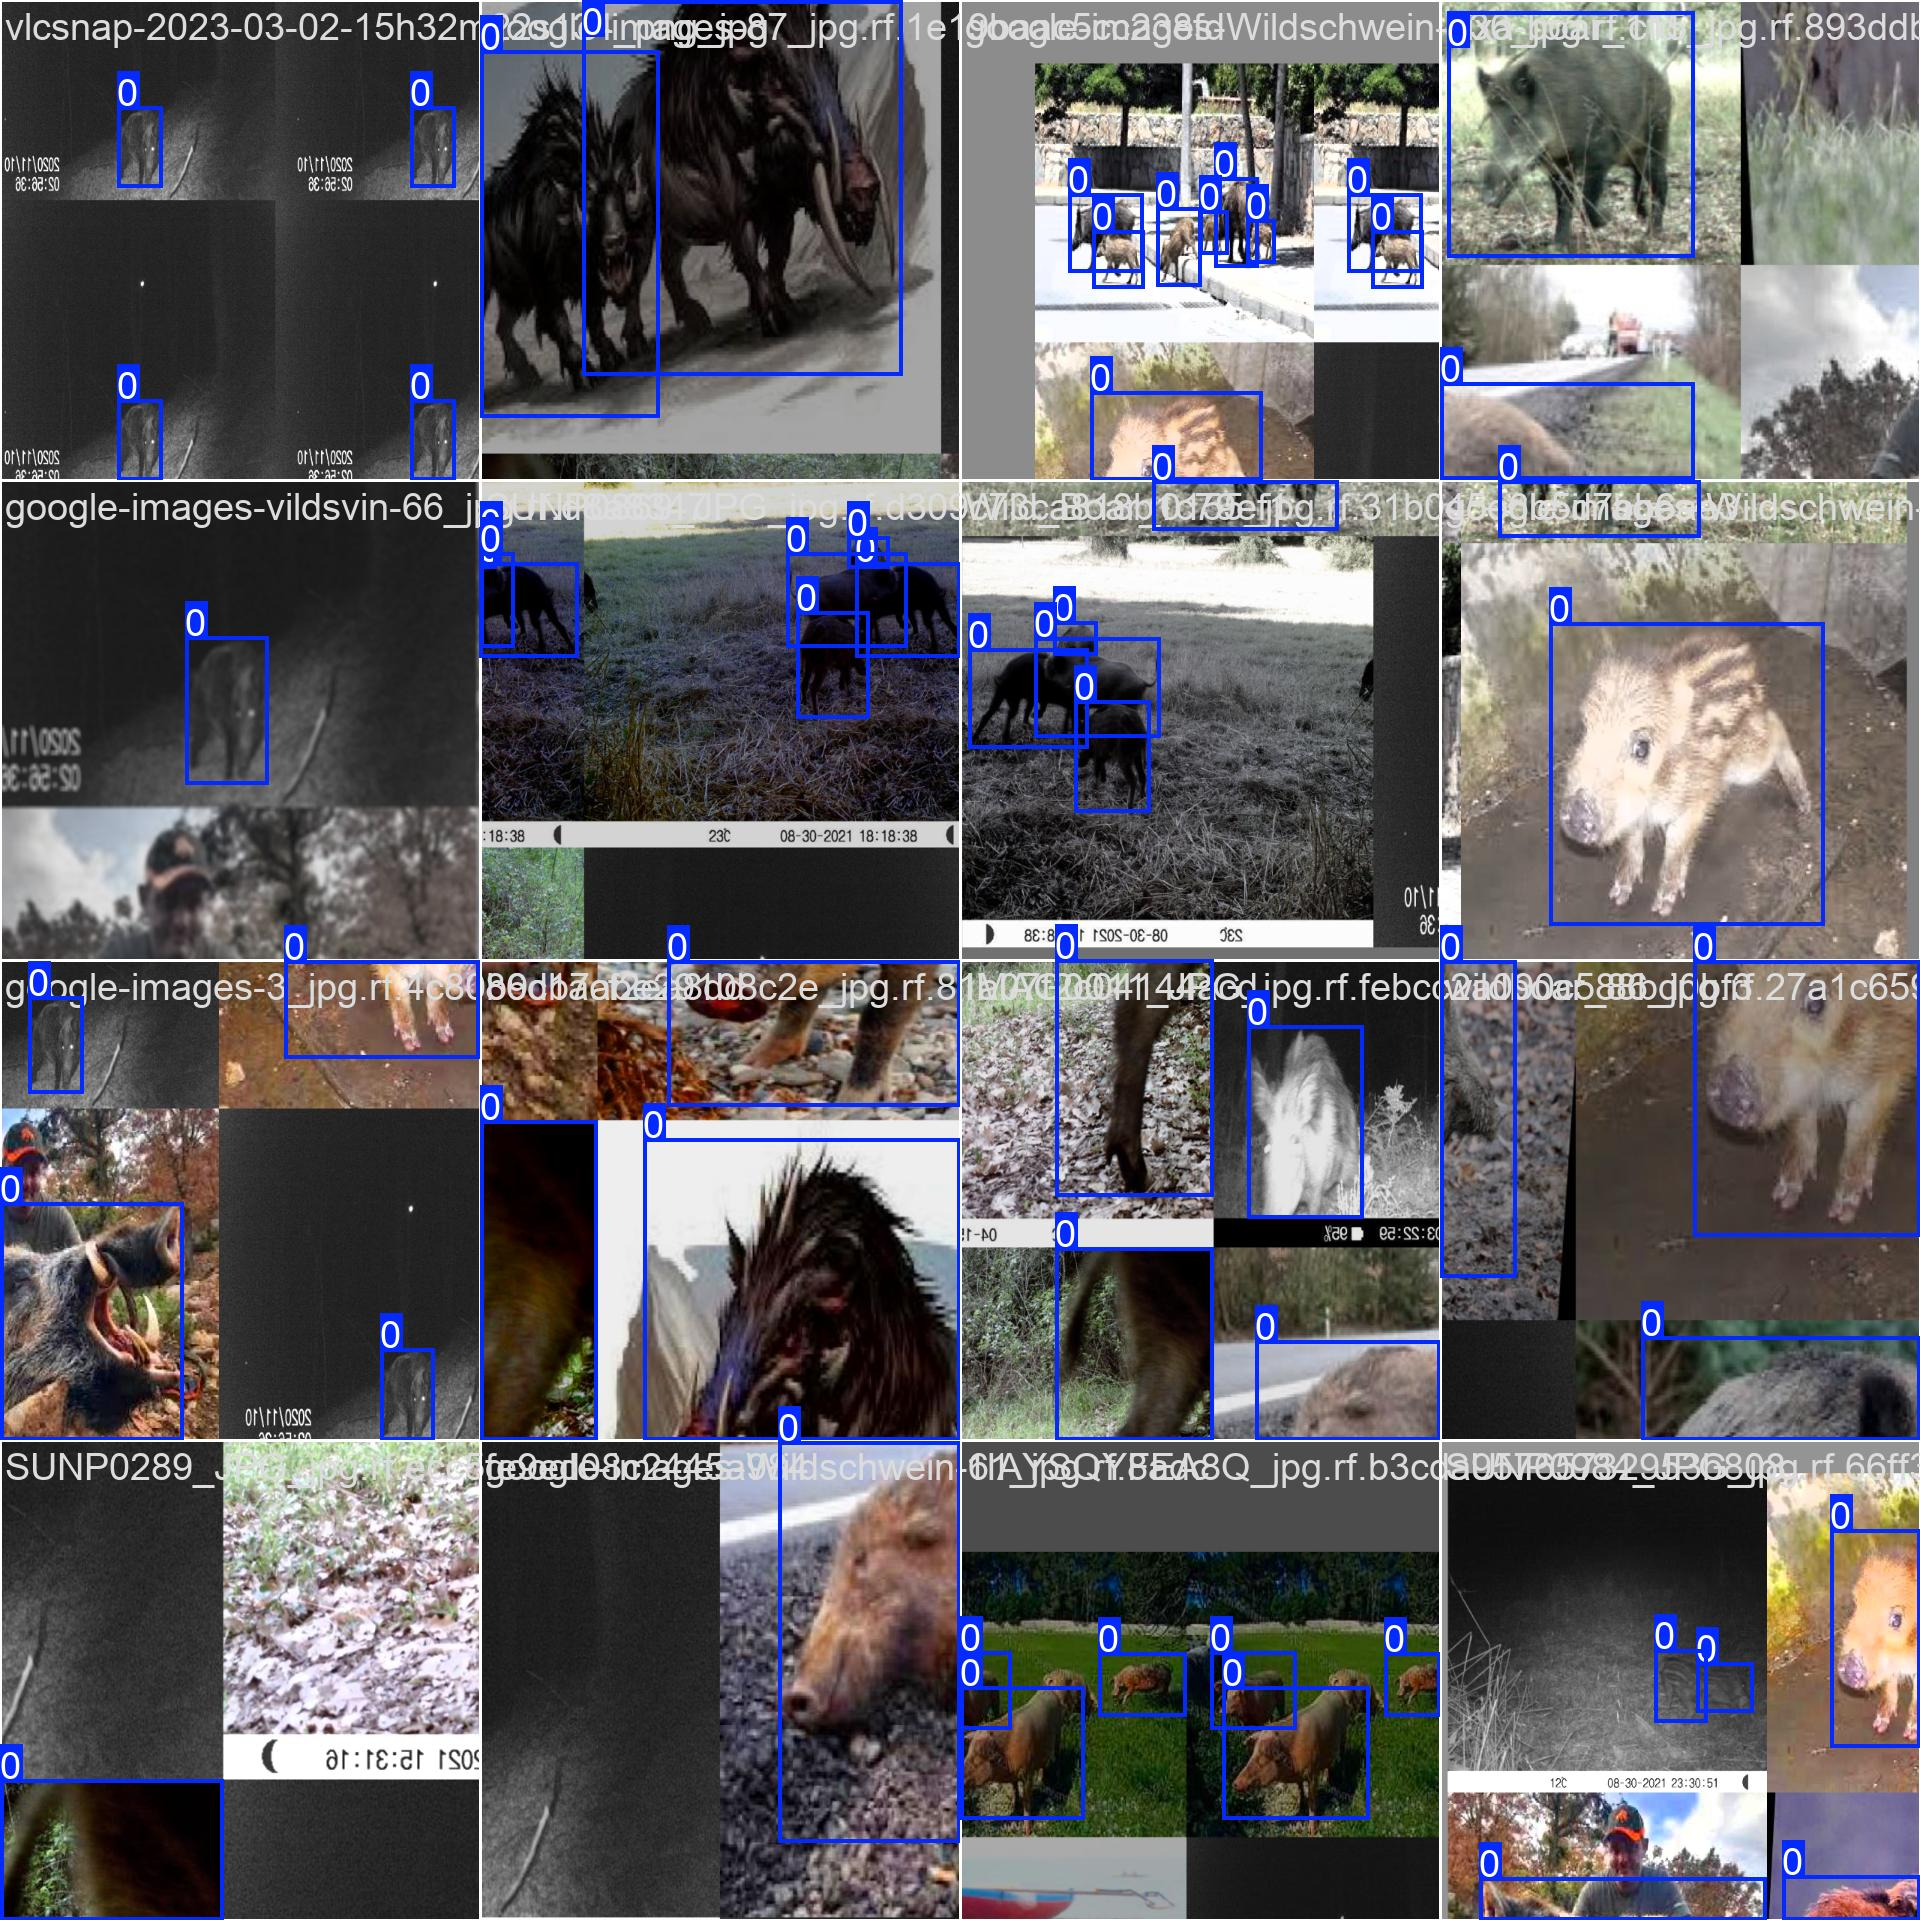

In [10]:
Image('/kaggle/working/runs/detect/train/train_batch0.jpg',width=800)

In [11]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Scanning /kaggle/working/final-1/valid/labels.cache... 1979 images, 0 backg
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 3313. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1979       3313      0.922      0.907      0.955      0.722
Speed: 0.3ms preprocess, 27.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/train/weights/best.pt' conf=.25 data={dataset.location}/test/images save=True source={dataset.location}/test/images

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs

image 1/988 /kaggle/working/final-1/test/images/00004_jpg.rf.0f593a068526e56b3d60663d3c8dda01.jpg: 640x640 1 pig, 36.8ms
image 2/988 /kaggle/working/final-1/test/images/00010_jpg.rf.f2dedef3646e2a206ef283394932b7bd.jpg: 640x640 1 pig, 36.8ms
image 3/988 /kaggle/working/final-1/test/images/00030_jpg.rf.f0d3aabf9e7b918be987f9b402f208b0.jpg: 640x640 1 pig, 36.8ms
image 4/988 /kaggle/working/final-1/test/images/00035_jpg.rf.2d39472940a6b5995841285bf98d5bcf.jpg: 640x640 1 pig, 36.8ms
image 5/988 /kaggle/working/final-1/test/images/00044_jpg.rf.ce69d1f94c6717a1cfd8a4c6c250f979.jpg: 640x640 1 pig, 36.8ms
image 6/988 /kaggle/working/final-1/test/images/00061_jpg.rf.05fc02655139d36600ba4d49209724ea.jpg: 640x640 1 pig, 36.8ms
image 7/988 /kaggle/working/final-1/test/images/00065_jpg.rf.9308badc8478390a23094a63878f6eea.jpg: 640x640 1 pig

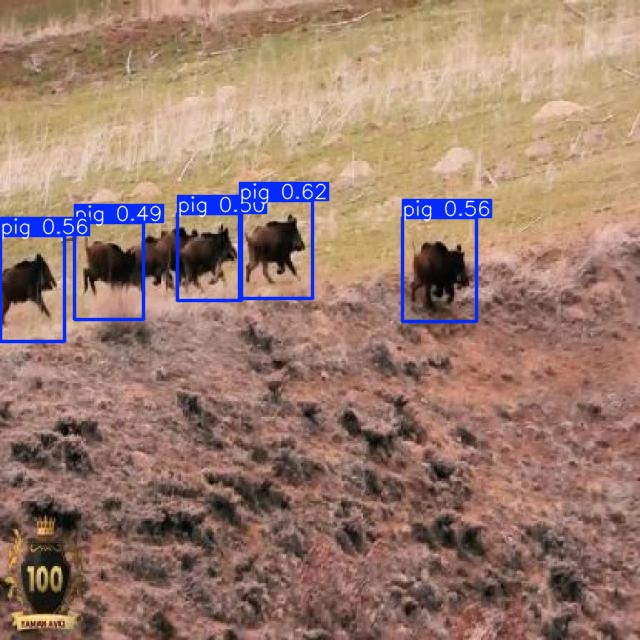

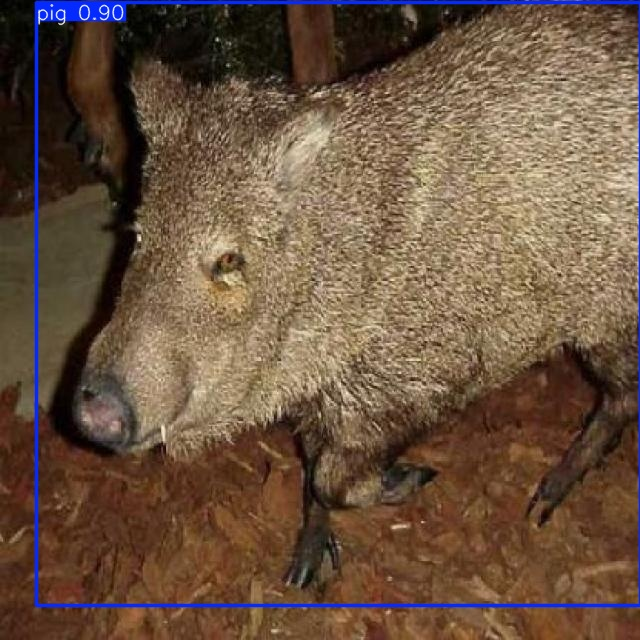

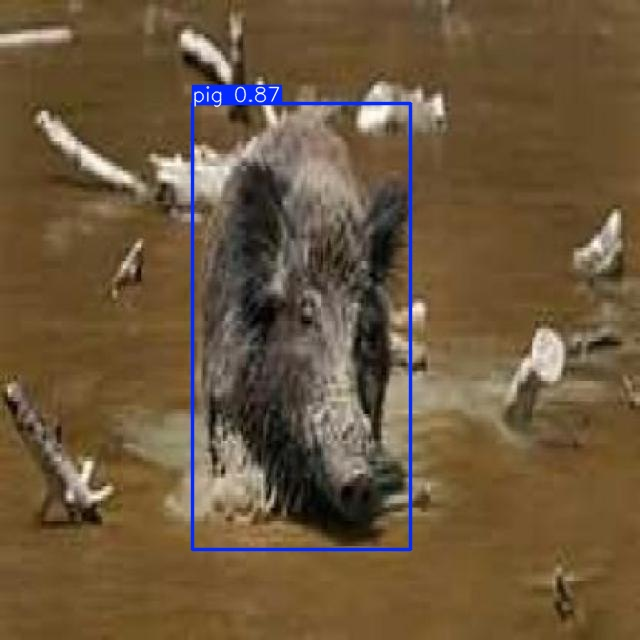

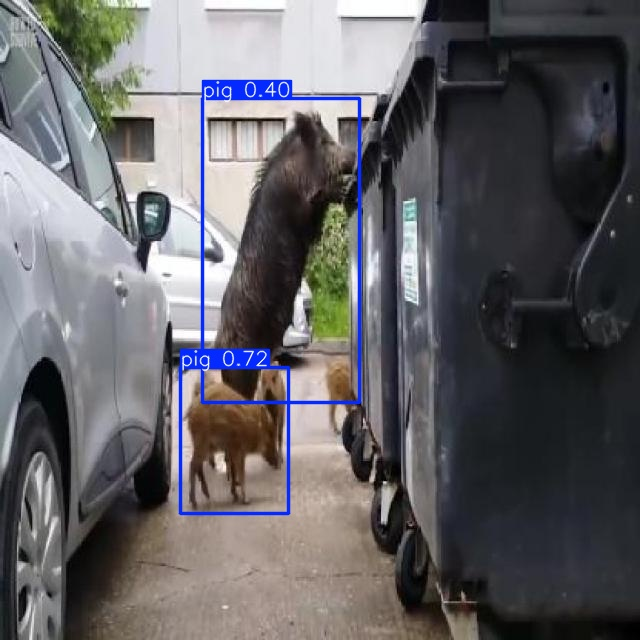

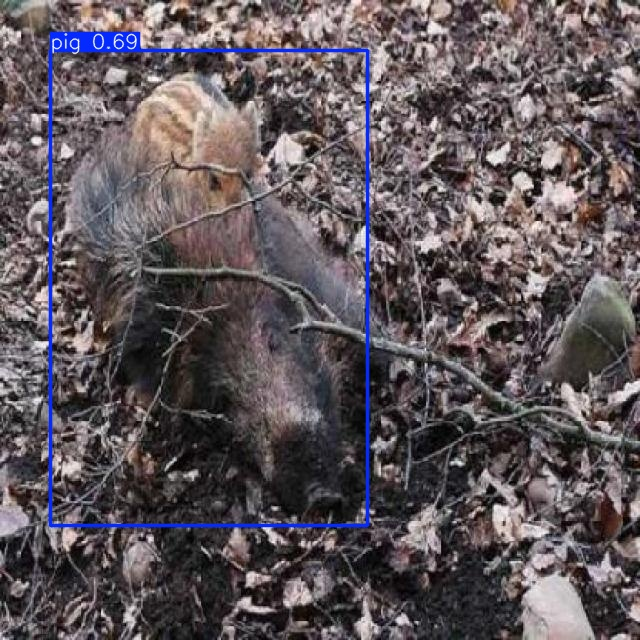

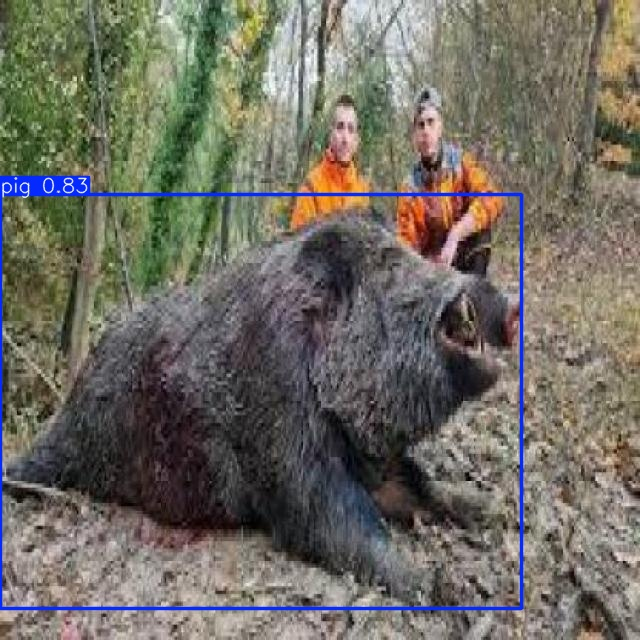

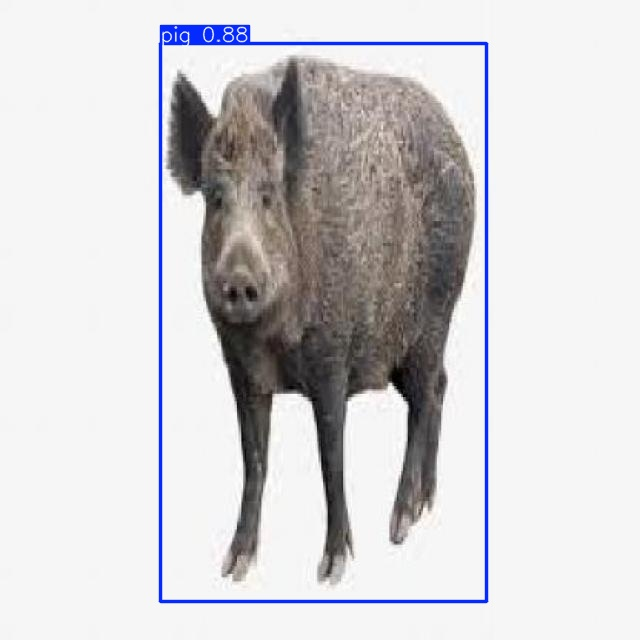

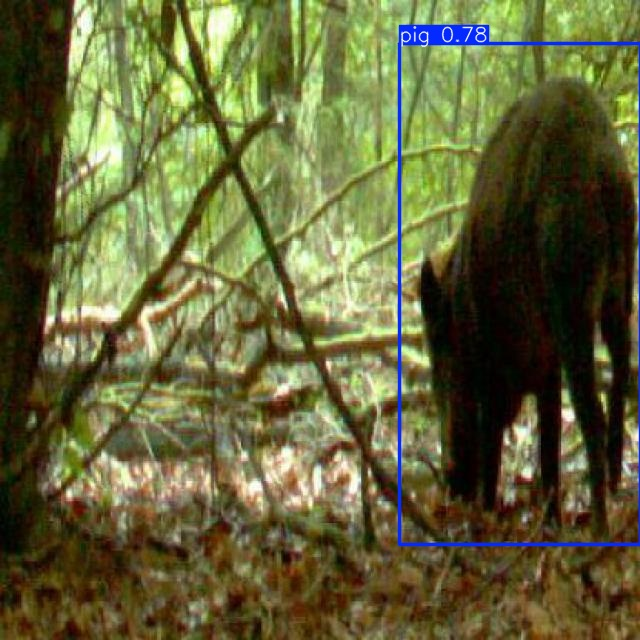

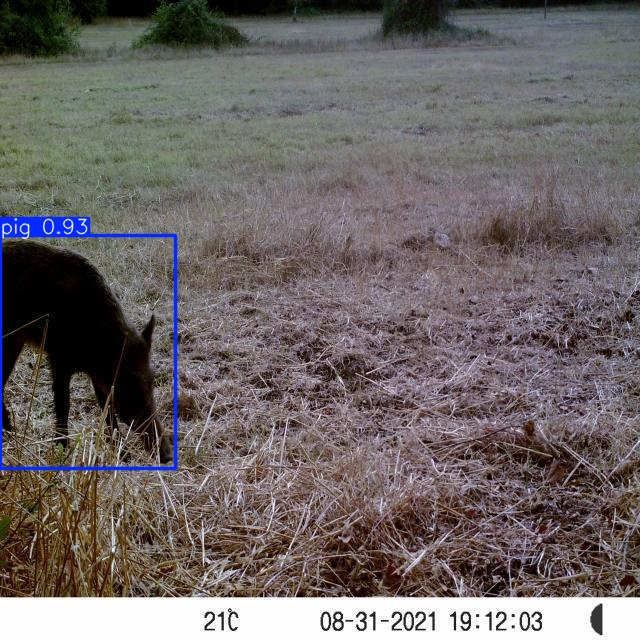

In [13]:
import glob
import os
from IPython.display import Image as IPyImage,display

latest=max(glob.iglob('/kaggle/working/runs/detect/predict*/'),key=os.path.getctime)
for img in glob.glob(f'{latest}/*jpg')[1:10]:
  display(IPyImage(filename=img,width=600))
  print('\n')

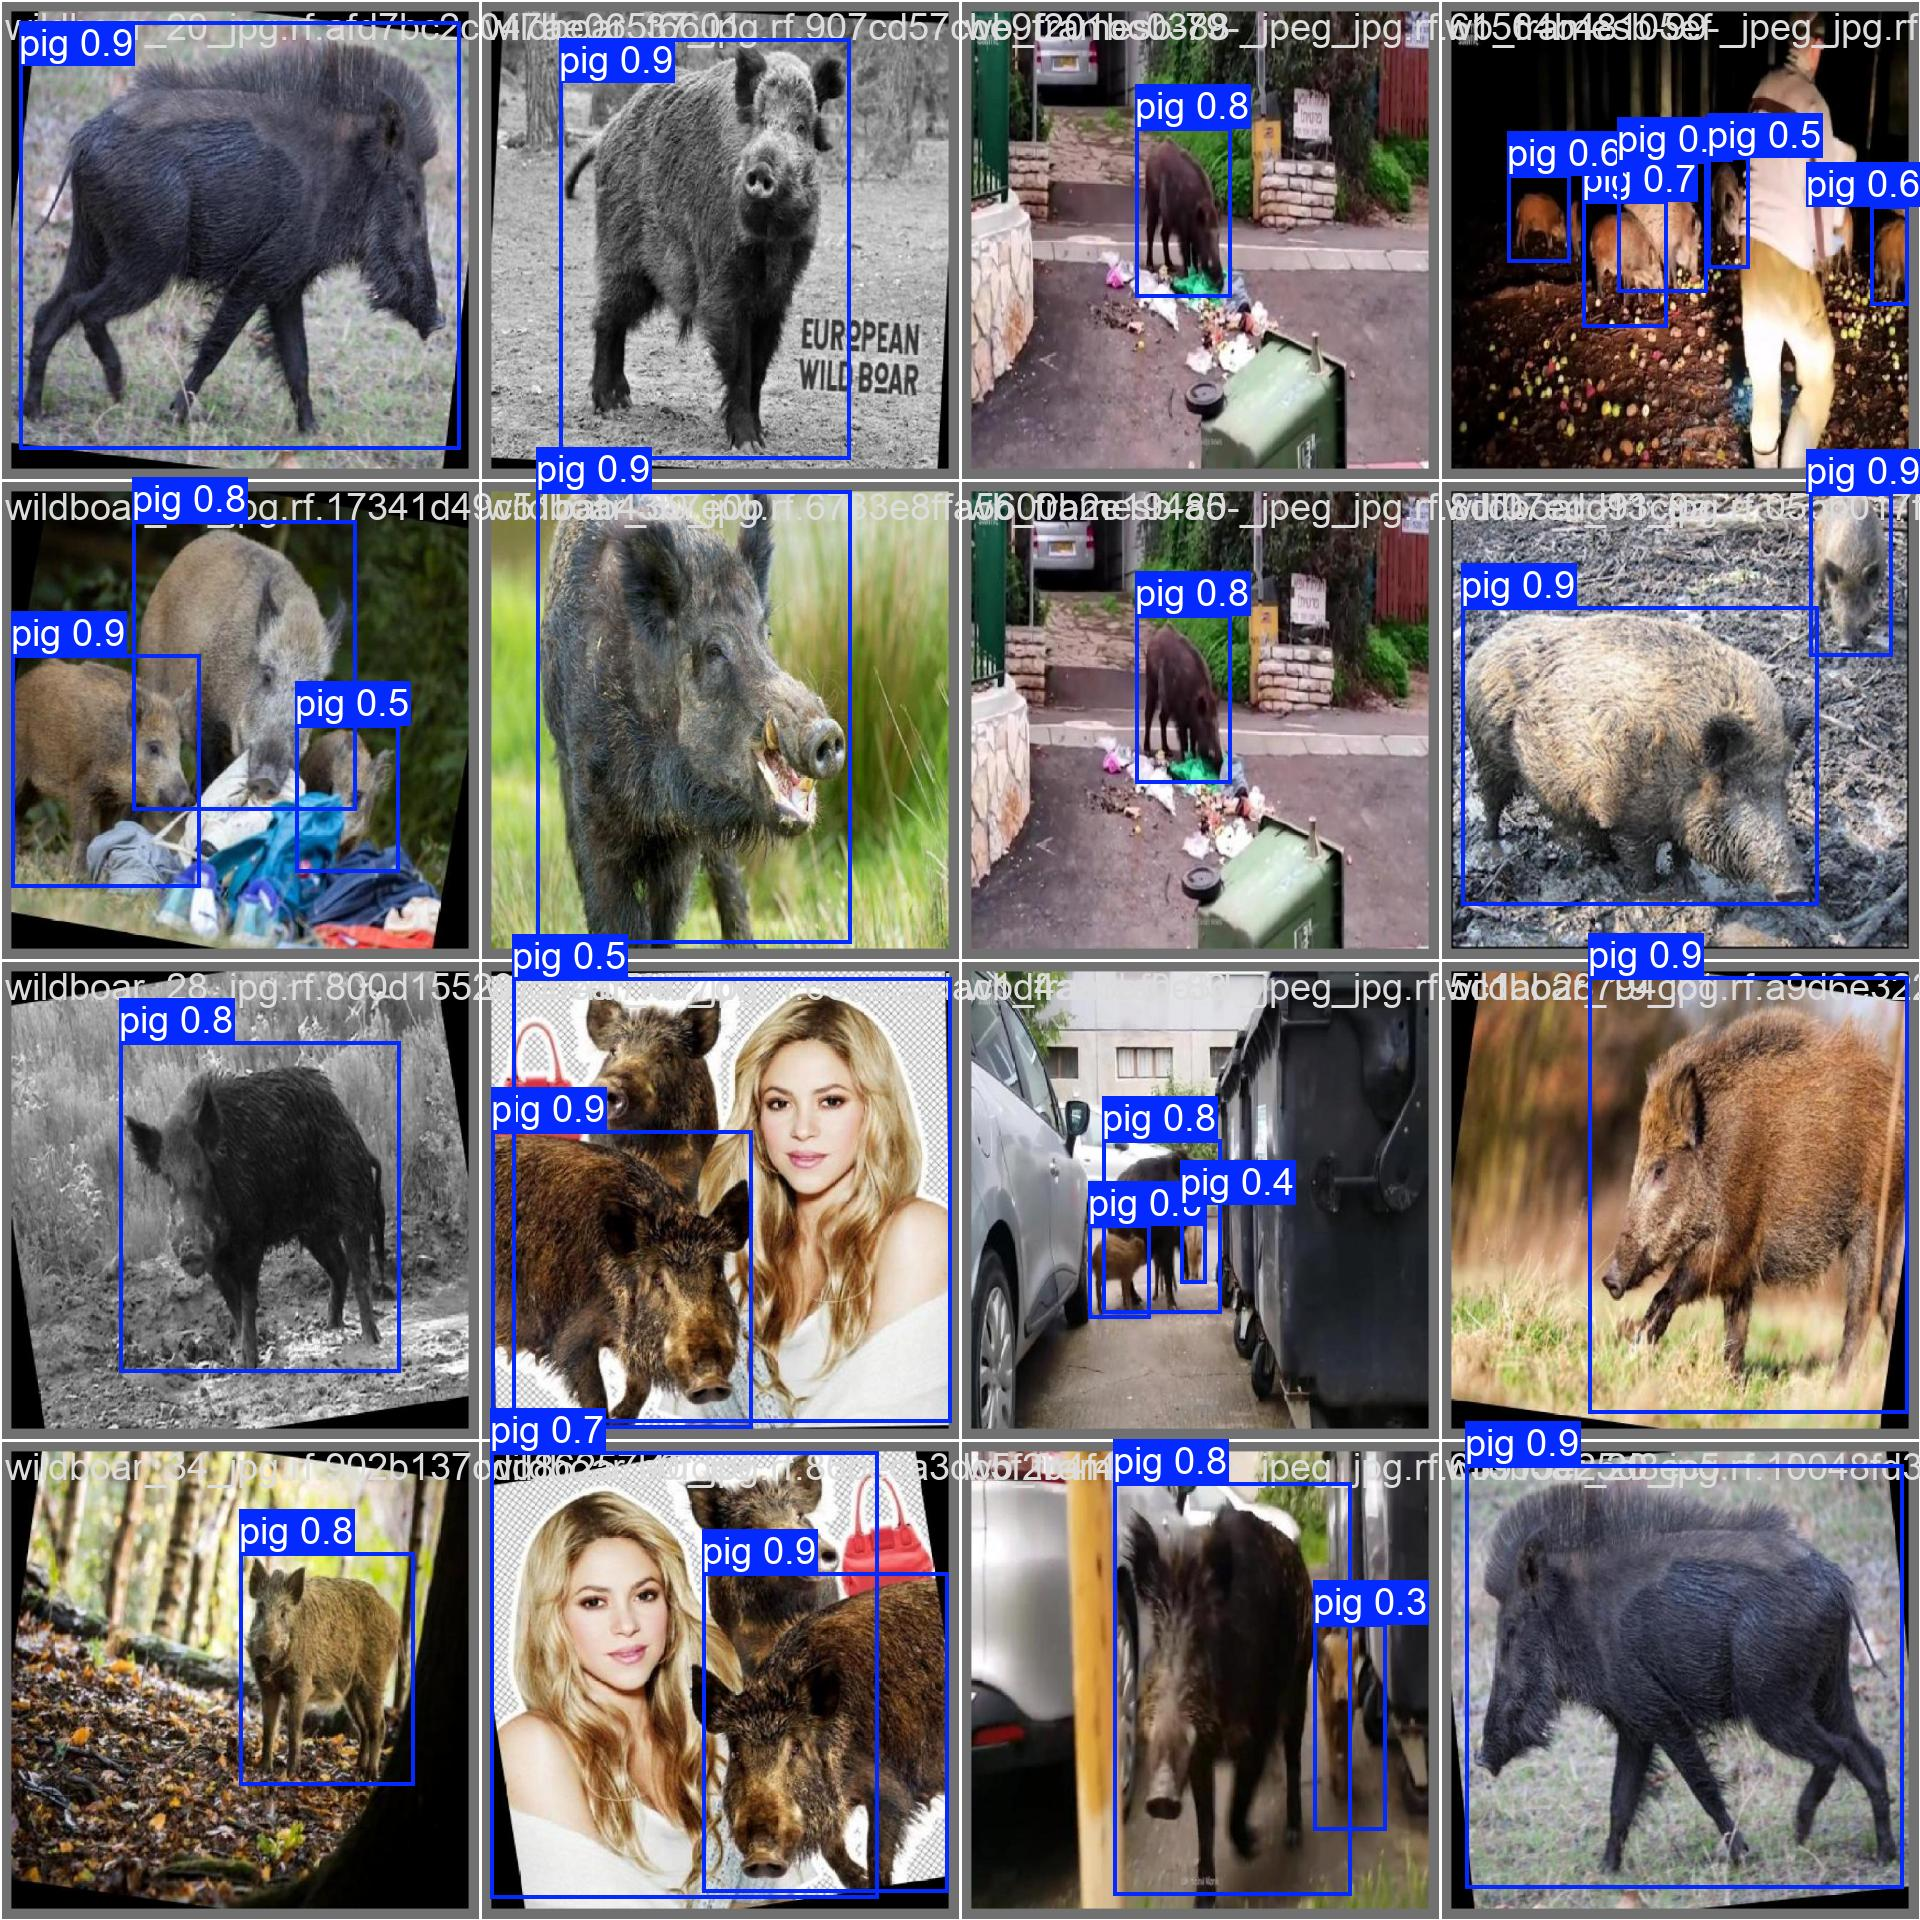

In [14]:
Image('/kaggle/working/runs/detect/train/val_batch0_pred.jpg',width=800)